# Little's law
The average number $L$ of customers is equal to the average effective arrival rate $\lambda$ multiplied by the average time $W$ that a customer spends in the system. With a formula, this means:
$$
L= \lambda W
$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown as md

%matplotlib inline


# output.layout.width = '850px'
plt.rcParams["figure.figsize"] = (12, 6) # (w, h)

ARRIVAL_RATE = 500 # 500 ops/s
ARRIVAL_INTERVAL = 1 / ARRIVAL_RATE * 1000
print(
f'''
    The arrival interval: {ARRIVAL_INTERVAL} ms
    The arrival rate (λ): {ARRIVAL_RATE / 1000} ops/ms
'''
)


    The arrival interval: 2.0 ms
    The arrival rate (λ): 0.5 ops/ms



## Configuring the queue with arrival times and service times

In [4]:
SAMPLE_SIZE = 15000
SERVICE_INTERVAL = 1 # ms

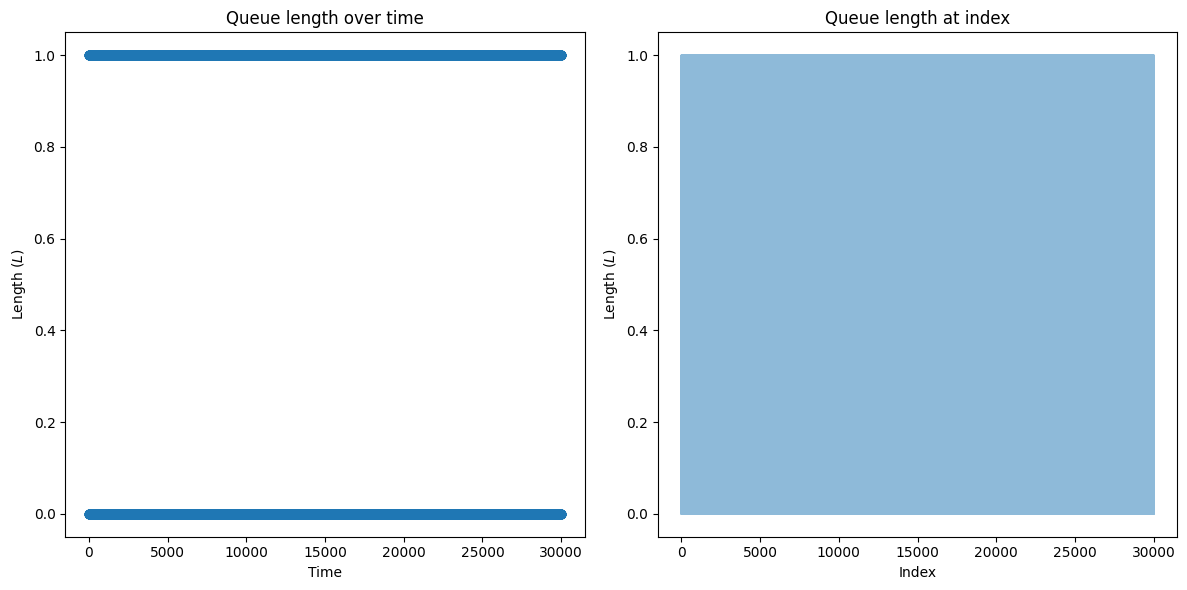

Mean queue length (*L*): 0.4999833338888704

In [42]:
from src.queue import Queue

inter_arrival_time = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=ARRIVAL_INTERVAL)
service_times = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=SERVICE_INTERVAL)

queue = Queue(inter_arrival_time, service_times, executors=1)
queue.process()

fig, (queue_length_time, queue_length) = plt.subplots(1, 2)

queue_length_time.set_title("Queue length over time")
queue_length_time.set(xlabel='Time', ylabel=r'Length ($L$)')
queue_length_time.scatter(*zip(*queue.length_with_timestamps), alpha=0.5)

queue_length.set_title("Queue length at index")
queue_length.set(xlabel='Index', ylabel=r'Length ($L$)')
queue_length.plot(queue.length, alpha=0.5)

fig.tight_layout()
plt.show()

md(f'Mean queue length (*L*): {queue.length.mean()}')


## Wait time and distribution

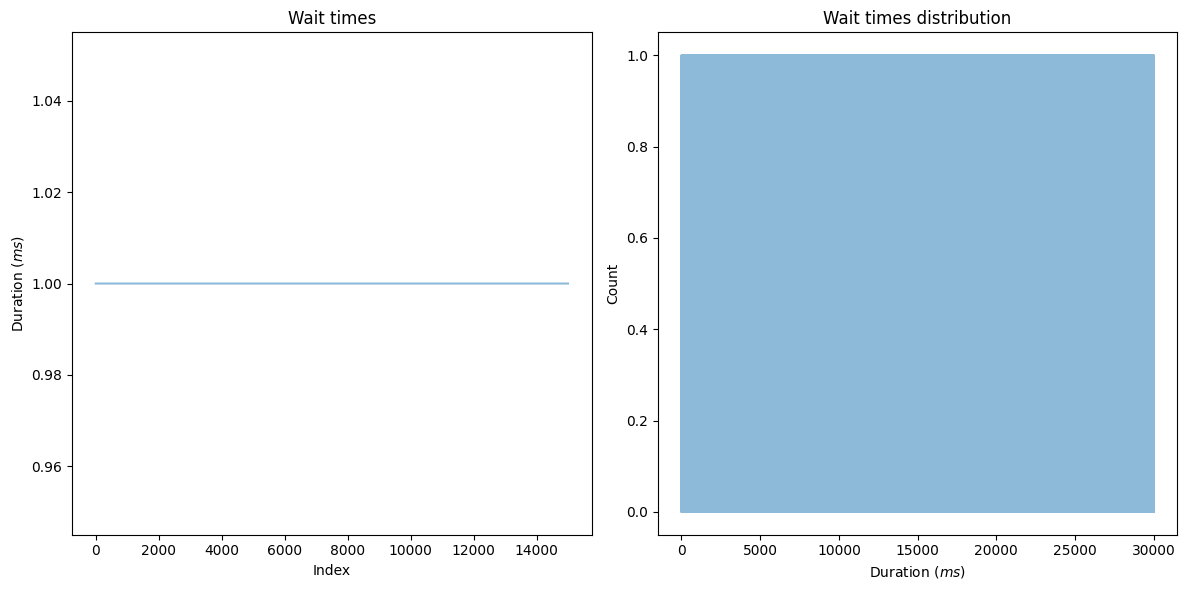

In [12]:
fig, (wait_times, wait_time_distribution) = plt.subplots(1, 2)

wait_times.set_title("Wait times")
wait_times.set(xlabel='Index', ylabel=r'Duration ($ms$)')
wait_times.plot(queue.wait_times, alpha=0.5)

wait_time_distribution.set_title("Wait times distribution")
wait_time_distribution.set(xlabel='Duration ($ms$)', ylabel='Count')
wait_time_distribution.plot(queue.length, alpha=0.5)

fig.tight_layout()
plt.show()

# Checking the values

In [13]:
print(f'The mean queue length (L): {queue.length.mean()}')
print(f'The arrival rate (λ): {ARRIVAL_RATE / 1000} ops/ms')
print(f'The mean wait time (W): {queue.wait_times.mean()} ms')
print(f'difference: {ARRIVAL_RATE / 1000 * queue.wait_times.mean() - queue.length.mean()}')

The mean queue length (L): 0.4999833338888704
The arrival rate (λ): 0.5 ops/ms
The mean wait time (W): 1.0 ms
difference: 1.6666111129604033e-05


# Work stockpiling up
What if we have a queue size greater than one? Imagine yourself arriving at a busy restaurant and let's give some hope to the place, so let's assume that the departure rate ($\mu$) is larger than the arrival rate ($\lambda$). Meaning, that $\mu > \lambda$ and eventually the system will stabilize and recover from the extra workload.

Assuming that the service duration is constantly $100 ms$ and we have $10$ people waiting before us - how much would we have to wait? $10 * 100 ms$ is required, so everyone is served before we can have the chance. 

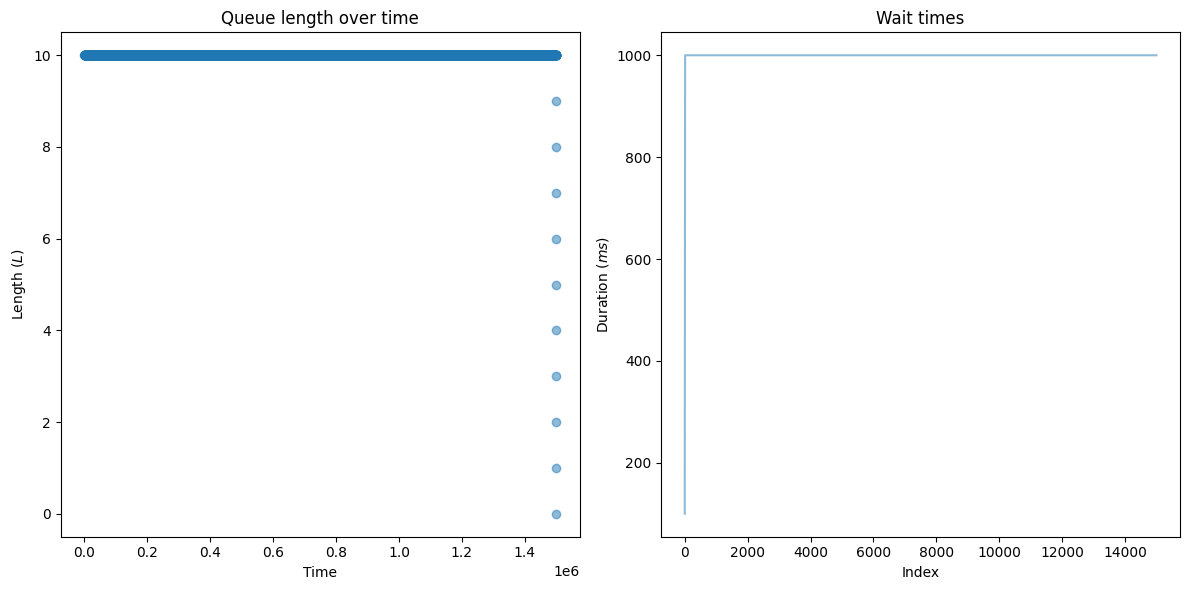

Mean queue length (L): 9.996333577761483
Mean arrival rate (λ): 0.01 ops/ms
Mean wait time (W): 999.7 ms
difference: 0.0006664222385168728


In [14]:
arrival_and_service_interval = 100
inter_arrival_time = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=100)
service_times = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=100)
# We'll have 10 elements in the queue constantly.
inter_arrival_time[0:10] = 0

queue = Queue(inter_arrival_time, service_times, executors=1)
queue.process()

fig, (queue_length_time, wait_times) = plt.subplots(1, 2)

queue_length_time.set_title("Queue length over time")
queue_length_time.set(xlabel='Time', ylabel=r'Length ($L$)')
queue_length_time.scatter(*zip(*queue.length_with_timestamps), alpha=0.5)

wait_times.set_title("Wait times")
wait_times.set(xlabel='Index', ylabel=r'Duration ($ms$)')
wait_times.plot(queue.wait_times, alpha=0.5)

fig.tight_layout()
plt.show()

print(f'Mean queue length (L): {queue.length.mean()}')
print(f'Mean arrival rate (λ): {1 / arrival_and_service_interval} ops/ms')
print(f'Mean wait time (W): {queue.wait_times.mean()} ms')
print(f'difference: {1 / arrival_and_service_interval * queue.wait_times.mean() - queue.length.mean()}')

# Important Observations

Based on the Wikipedia article we should be able to observe
- The relationship is not influenced by the arrival process distribution
- The relationship is not influenced by the service distribution
- The relationship is not influenced by the service order (scheduling)
- In most queuing systems, service time is the bottleneck that creates the queue.
- The result applies to any system, and particularly, it applies to systems within systems.

Let's have an example on each of these:

## Arrival process distribution
So far we have configured a $D/D/1$ queue based on Kendall's notation, now let's see if things change in the case of $M/D/1$ queues:

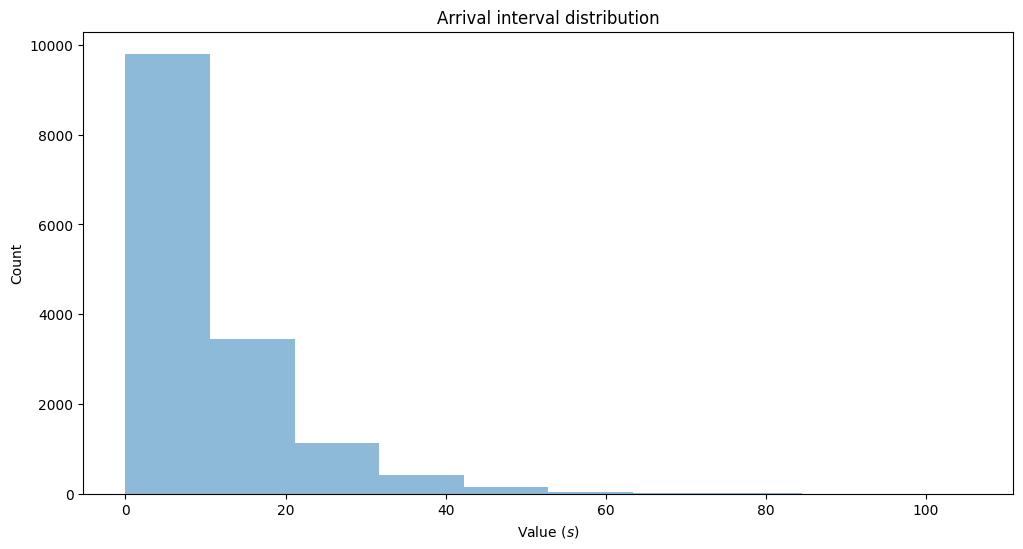

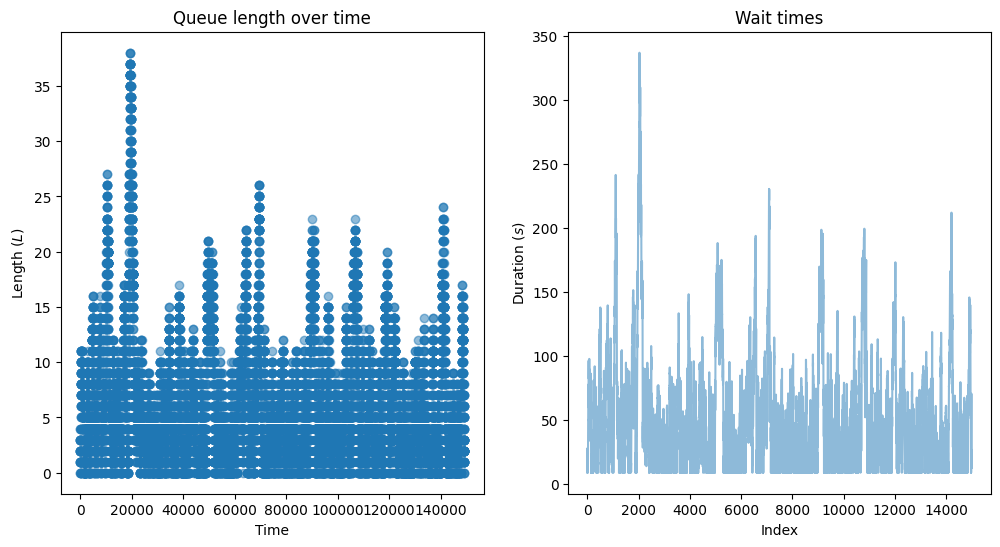

Mean arrival interval: 9.949198098590834 s
Mean arrival rate (λ): 0.10051061302534886 ops/s
Mean wait time (W): 50.39353138716936 s
Mean queue length (L): 5.551348288390387
λ * W: 5.065084732236551
difference: -0.486263556153836


In [16]:
inter_arrival_time = np.random.exponential(scale=10, size=SAMPLE_SIZE)

plt.title("Arrival interval distribution")
plt.xlabel("Value ($s$)")
plt.ylabel("Count")
plt.hist(inter_arrival_time, alpha=0.5)
plt.show()

service_interval = inter_arrival_time.mean()
service_times = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=service_interval)

queue = Queue(inter_arrival_time, service_times, executors=1)
queue.process()

fig, (queue_length_time, wait_times) = plt.subplots(1, 2)

queue_length_time.set_title("Queue length over time")
queue_length_time.set(xlabel='Time', ylabel=r'Length ($L$)')
queue_length_time.scatter(*zip(*queue.length_with_timestamps), alpha=0.5)

wait_times.set_title("Wait times")
wait_times.set(xlabel='Index', ylabel=r'Duration ($s$)')
wait_times.plot(queue.wait_times, alpha=0.5)

plt.show()


print(f'Mean arrival interval: {inter_arrival_time.mean()} s')
print(f'Mean arrival rate (λ): {1 / inter_arrival_time.mean()} ops/s')
print(f'Mean wait time (W): {queue.wait_times.mean()} s')
print(f'Mean queue length (L): {queue.length.mean()}')
print(f'λ * W: {1 / inter_arrival_time.mean() * queue.wait_times.mean()}')
print(f'difference: {1 / inter_arrival_time.mean() * queue.wait_times.mean() - queue.length.mean()}')

### Why do we have a slight difference? 

Note, that in the example above we calculate mean queue length over the values and do not consider elapsed time. Another cause of imperfection is that queue size does not reflect the work currently being done. E.g. the presently processed item also counts as the total number of items currently in the system.

### Parallelism
Let's see a couple of cases, where we have an increased number of servers and how it affects Little's law. Consider an arrival interval of $100 ms$ and service time of $250 ms$. But in this case, we'll have 4 servers.

So the arrival rate $\lambda = 0.01 ops/ms$ and the wait time for each task "could" be $250 ms$. This is possible only if the queue length is close to zero and each server can pick the next arriving task immediately. So in this case $W = 250 ms$. These above leave us with $L = 2.5$

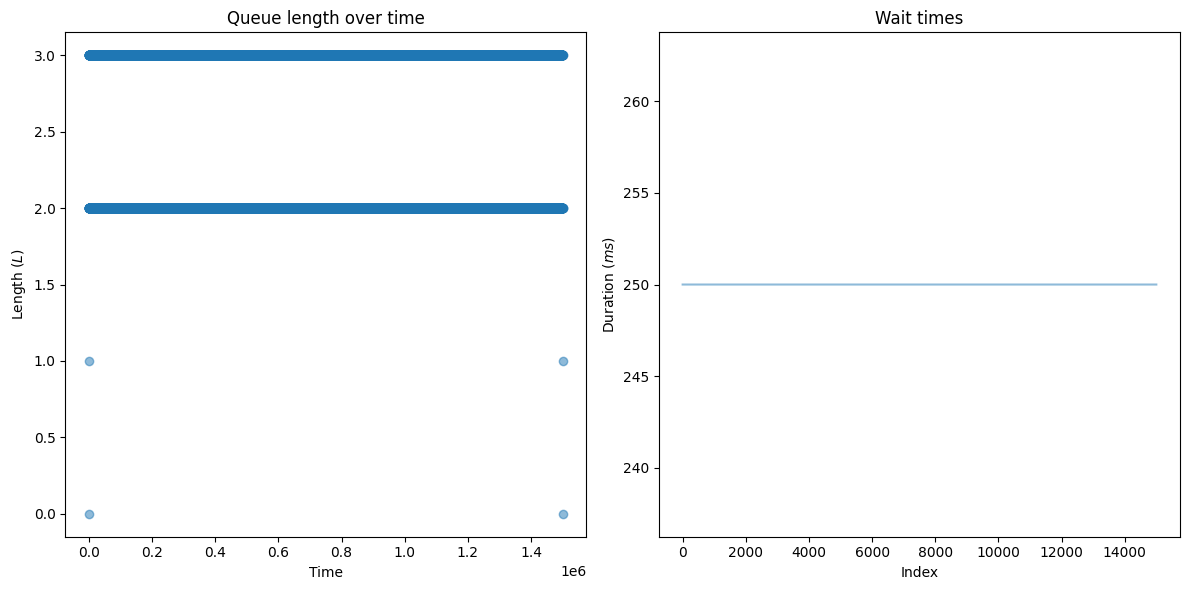

Mean queue length (L): 2.4997166761107965
Mean arrival rate (λ): 0.01 ops/ms
Mean wait time (W): 250.0 ms
difference: 0.0002833238892034906


In [18]:
arrival_interval = 100
service_interval = 250
inter_arrival_time = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=arrival_interval)
service_times = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=service_interval)

queue = Queue(inter_arrival_time, service_times, executors=4)
queue.process()

fig, (queue_length_time, wait_times) = plt.subplots(1, 2)

queue_length_time.set_title("Queue length over time")
queue_length_time.set(xlabel='Time', ylabel=r'Length ($L$)')
queue_length_time.scatter(*zip(*queue.length_with_timestamps), alpha=0.5)

wait_times.set_title("Wait times")
wait_times.set(xlabel='Index', ylabel=r'Duration ($ms$)')
wait_times.plot(queue.wait_times, alpha=0.5)

fig.tight_layout()
plt.show()

print(f'Mean queue length (L): {queue.length.mean()}')
print(f'Mean arrival rate (λ): {1 / arrival_and_service_interval} ops/ms')
print(f'Mean wait time (W): {queue.wait_times.mean()} ms')
print(f'difference: {1 / arrival_and_service_interval * queue.wait_times.mean() - queue.length.mean()}')

# Wavelike patterns
Assuming that we have a rising and then declining traffic as the arrival rate, how is it affecting our calculation above? What should be considered when determining the mean queue length?

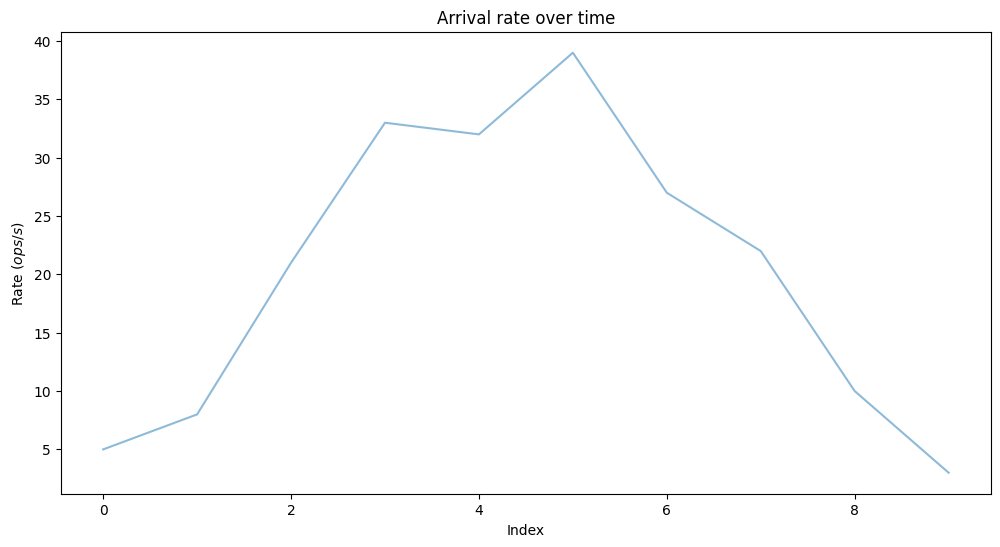

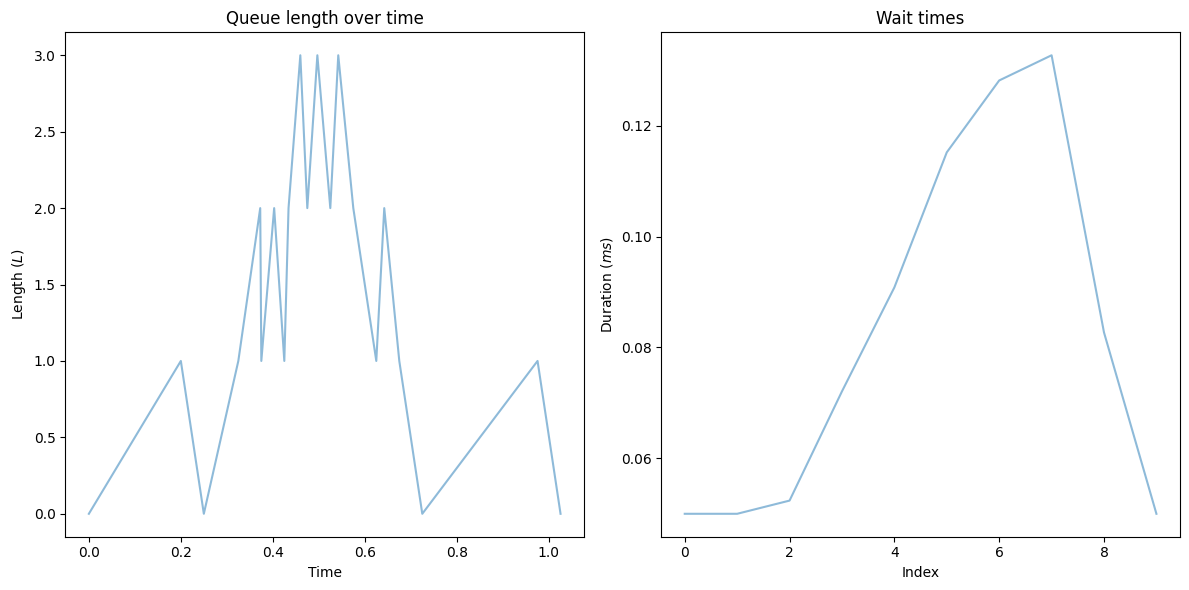

Mean queue length (L): 1.4285714285714286
Mean arrival rate (λ): 20.0 ops/s
Mean wait time (W): 0.08240141802641808 s
difference: 0.21945693195693305


In [48]:
mean, stddev = 2, 200 # mean and standard deviation
values = np.random.normal(loc=mean,scale=stddev,size=200)
arrival_rate, _ = np.histogram(values)

plt.title("Arrival rate over time")
plt.ylabel("Rate ($ops/s$)")
plt.xlabel("Index")
plt.plot(arrival_rate, alpha=0.5)
plt.show()

service_intervals = np.full(shape=len(arrival_rate), dtype=float, fill_value=1 / arrival_rate.mean())
queue = Queue(1 / arrival_rate, service_intervals, executors=1)
queue.process()

fig, (queue_length_time, wait_times) = plt.subplots(1, 2)

queue_length_time.set_title("Queue length over time")
queue_length_time.set(xlabel='Time', ylabel=r'Length ($L$)')
queue_length_time.plot(*zip(*queue.length_with_timestamps), alpha=0.5)

wait_times.set_title("Wait times")
wait_times.set(xlabel='Index', ylabel=r'Duration ($s$)')
wait_times.plot(queue.wait_times, alpha=0.5)

fig.tight_layout()
plt.show()

print(f'Mean queue length (L): {queue.length.mean()}')
print(f'Mean arrival rate (λ): {arrival_rate.mean()} ops/s')
print(f'Mean wait time (W): {queue.wait_times.mean()} s')
print(f'difference: {arrival_rate.mean() * queue.wait_times.mean() - queue.length.mean()}')

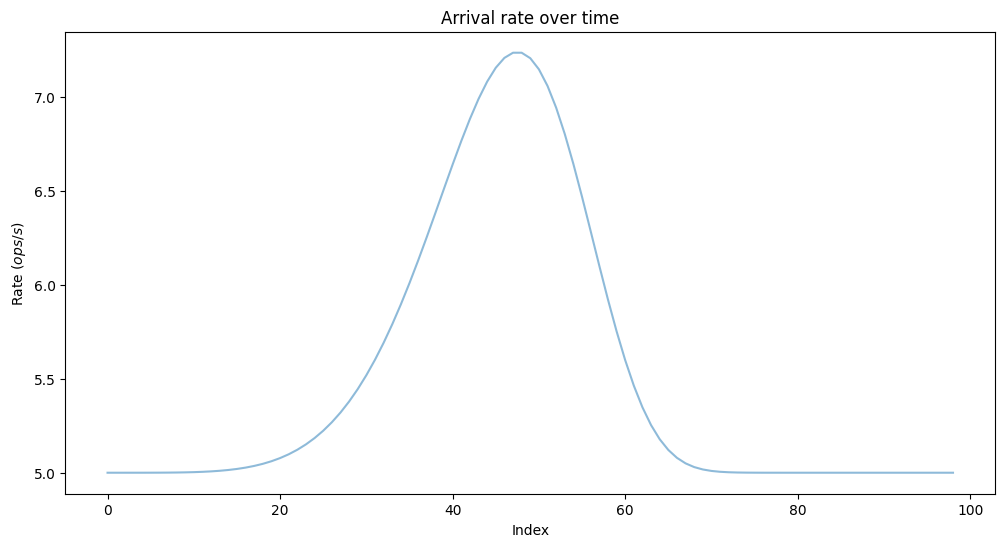

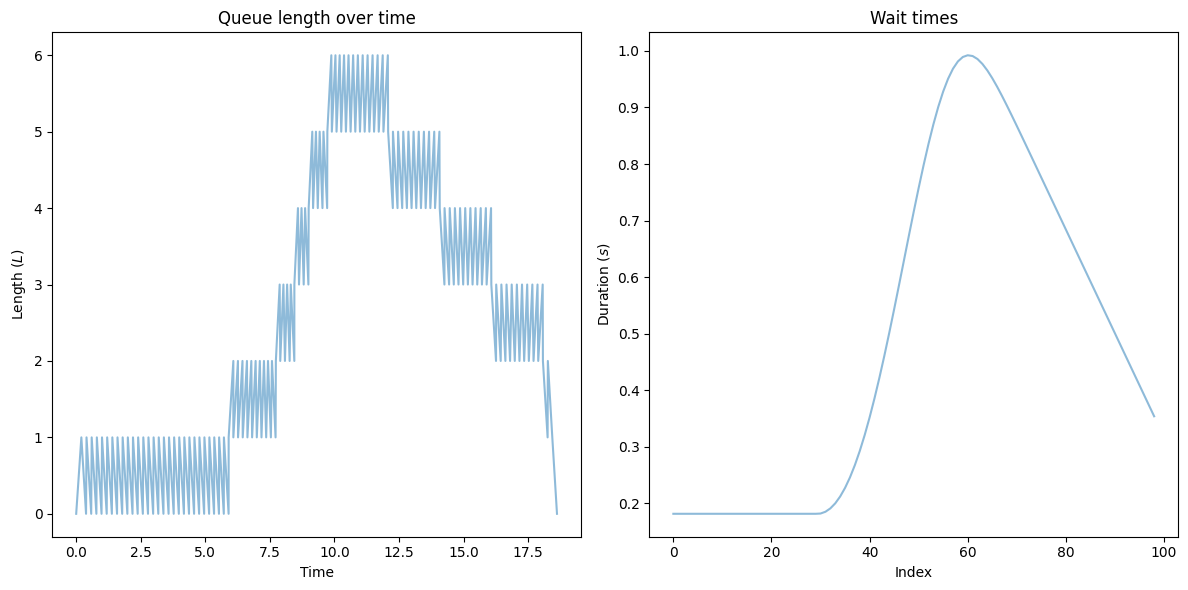

Mean queue length (L): 2.5979899497487438
Mean arrival rate (λ): 5.505050505049736 ops/s
Maximum arrival rate (λ): 7.236480783818904 ops/s
Mean service rate (μ): 5.505050505049736 ops/s
Mean wait time (W): 0.49745201765688063 s
difference: 0.14050853129127727


In [107]:
NUMBER_OF_SAMPLES = 100
def weibull_distr(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

arrival_rate = np.array([weibull_distr(x/NUMBER_OF_SAMPLES*2, 1., 6.) + 5 for x in range(1,NUMBER_OF_SAMPLES)])

plt.title("Arrival rate over time")
plt.ylabel("Rate ($ops/s$)")
plt.xlabel("Index")
plt.plot(arrival_rate, alpha=0.5)
plt.show()

# Have a bit faster service rate, than arrival rate.
service_rate = arrival_rate.mean()
service_intervals = np.full(shape=len(arrival_rate), dtype=float, fill_value=1 / service_rate)
queue = Queue(1 / arrival_rate, service_intervals, executors=1)
queue.process()

fig, (queue_length_time, wait_times) = plt.subplots(1, 2)

queue_length_time.set_title("Queue length over time")
queue_length_time.set(xlabel='Time', ylabel=r'Length ($L$)')
queue_length_time.plot(*zip(*queue.length_with_timestamps), alpha=0.5)

wait_times.set_title("Wait times")
wait_times.set(xlabel='Index', ylabel=r'Duration ($s$)')
wait_times.plot(queue.wait_times, alpha=0.5)

fig.tight_layout()
plt.show()

print(f'Mean queue length (L): {queue.length.mean()}')
print(f'Mean arrival rate (λ): {arrival_rate.mean()} ops/s')
print(f'Maximum arrival rate: {arrival_rate.max()} ops/s')
print(f'Mean service rate (μ): {service_rate} ops/s')
print(f'Mean wait time (W): {queue.wait_times.mean()} s')
print(f'difference: {arrival_rate.mean() * queue.wait_times.mean() - queue.length.mean()}')

# References
- [Little's law Wiki](https://en.wikipedia.org/wiki/Little%27s_law)
- [Kendall's notation](https://en.wikipedia.org/wiki/Kendall%27s_notation)